R² Score: 0.9113048651706634
MSE: 45720769.75632412


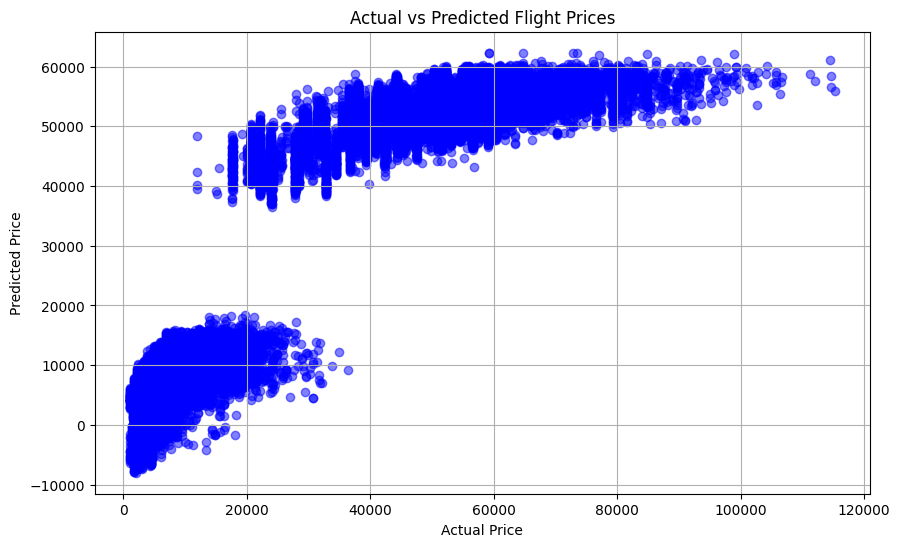

Dropdown(description='Airline:', options=('Air India', 'GO FIRST', 'Indigo', 'SpiceJet', 'Vistara'), value='Ai…

Dropdown(description='Source:', options=('Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'), value='Chennai…

Dropdown(description='Destination:', options=('Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'), value='Ch…

Dropdown(description='Departure:', options=('Early_Morning', 'Evening', 'Late_Night', 'Morning', 'Night'), val…

Dropdown(description='Arrival:', options=('Early_Morning', 'Evening', 'Late_Night', 'Morning', 'Night'), value…

Dropdown(description='Stops:', options=('zero', 'two_or_more'), value='zero')

IntText(value=120, description='Duration (min):')

IntText(value=10, description='Days Left:')

Button(description='Predict Price', style=ButtonStyle())

Output()

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn
# Flight Price Prediction System

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"D:\4th sem\Elective Project\dataset\flight_data.csv.csv")
df.head()
# Check for missing values
df.isnull().sum()
# Drop rows with missing values
df.dropna(inplace=True)

# Show data types
df.dtypes

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and inspect data
df = pd.read_csv(r"D:\4th sem\Elective Project\dataset\flight_data.csv.csv")
df.columns = df.columns.str.strip()  # Remove any unwanted spaces

# Drop 'Unnamed: 0' and 'flight' since they’re not useful
df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['airline', 'source_city', 'departure_time',
                                 'stops', 'arrival_time', 'destination_city', 'class'],
                    drop_first=True)

# Features and label
X = df.drop(['price'], axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Prices")
plt.grid(True)
plt.show()
import joblib
joblib.dump(model , 'flight_price_model.pkl')
model = joblib.load('flight_price_model.pkl')
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import joblib

# Load the trained model
model = joblib.load('flight_price_model.pkl')

# List of features the model expects, in order (adjust as per your training data)
feature_cols = ['duration', 'days_left', 'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
                'airline_SpiceJet', 'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
                'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
                'departure_time_Early_Morning', 'departure_time_Evening', 'departure_time_Late_Night',
                'departure_time_Morning', 'departure_time_Night', 'stops_two_or_more', 'stops_zero',
                'arrival_time_Early_Morning', 'arrival_time_Evening', 'arrival_time_Late_Night',
                'arrival_time_Morning', 'arrival_time_Night', 'destination_city_Chennai',
                'destination_city_Delhi', 'destination_city_Hyderabad', 'destination_city_Kolkata',
                'destination_city_Mumbai', 'class_Economy']

# Create widgets for user input (adjust options if your dataset is different)
airline_widget = widgets.Dropdown(
    options=['Air India', 'GO FIRST', 'Indigo', 'SpiceJet', 'Vistara'],
    description='Airline:',
)

source_widget = widgets.Dropdown(
    options=['Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
    description='Source:',
)

destination_widget = widgets.Dropdown(
    options=['Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
    description='Destination:',
)

departure_time_widget = widgets.Dropdown(
    options=['Early_Morning', 'Evening', 'Late_Night', 'Morning', 'Night'],
    description='Departure:',
)

arrival_time_widget = widgets.Dropdown(
    options=['Early_Morning', 'Evening', 'Late_Night', 'Morning', 'Night'],
    description='Arrival:',
)

stops_widget = widgets.Dropdown(
    options=['zero', 'two_or_more'],
    description='Stops:',
)

duration_widget = widgets.IntText(
    value=120,
    description='Duration (min):',
)

days_left_widget = widgets.IntText(
    value=10,
    description='Days Left:',
)

# Class is fixed Economy in your features
# If your model has other classes, add a widget similarly

output = widgets.Output()

def predict_price(_):
    # Prepare input dict for one-hot encoding
    input_dict = {
        'duration': duration_widget.value,
        'days_left': days_left_widget.value,
        # Airlines one-hot encoding keys
        'airline_Air_India': 1 if airline_widget.value == 'Air India' else 0,
        'airline_GO_FIRST': 1 if airline_widget.value == 'GO FIRST' else 0,
        'airline_Indigo': 1 if airline_widget.value == 'Indigo' else 0,
        'airline_SpiceJet': 1 if airline_widget.value == 'SpiceJet' else 0,
        'airline_Vistara': 1 if airline_widget.value == 'Vistara' else 0,
        # Source city one-hot
        'source_city_Chennai': 1 if source_widget.value == 'Chennai' else 0,
        'source_city_Delhi': 1 if source_widget.value == 'Delhi' else 0,
        'source_city_Hyderabad': 1 if source_widget.value == 'Hyderabad' else 0,
        'source_city_Kolkata': 1 if source_widget.value == 'Kolkata' else 0,
        'source_city_Mumbai': 1 if source_widget.value == 'Mumbai' else 0,
        # Departure time one-hot
        'departure_time_Early_Morning': 1 if departure_time_widget.value == 'Early_Morning' else 0,
        'departure_time_Evening': 1 if departure_time_widget.value == 'Evening' else 0,
        'departure_time_Late_Night': 1 if departure_time_widget.value == 'Late_Night' else 0,
        'departure_time_Morning': 1 if departure_time_widget.value == 'Morning' else 0,
        'departure_time_Night': 1 if departure_time_widget.value == 'Night' else 0,
        # Stops one-hot
        'stops_two_or_more': 1 if stops_widget.value == 'two_or_more' else 0,
        'stops_zero': 1 if stops_widget.value == 'zero' else 0,
        # Arrival time one-hot
        'arrival_time_Early_Morning': 1 if arrival_time_widget.value == 'Early_Morning' else 0,
        'arrival_time_Evening': 1 if arrival_time_widget.value == 'Evening' else 0,
        'arrival_time_Late_Night': 1 if arrival_time_widget.value == 'Late_Night' else 0,
        'arrival_time_Morning': 1 if arrival_time_widget.value == 'Morning' else 0,
        'arrival_time_Night': 1 if arrival_time_widget.value == 'Night' else 0,
        # Destination city one-hot
        'destination_city_Chennai': 1 if destination_widget.value == 'Chennai' else 0,
        'destination_city_Delhi': 1 if destination_widget.value == 'Delhi' else 0,
        'destination_city_Hyderabad': 1 if destination_widget.value == 'Hyderabad' else 0,
        'destination_city_Kolkata': 1 if destination_widget.value == 'Kolkata' else 0,
        'destination_city_Mumbai': 1 if destination_widget.value == 'Mumbai' else 0,
        # Class Economy fixed 1 (if your model expects it)
        'class_Economy': 1,
    }
    
    # Create DataFrame and reorder columns
    input_df = pd.DataFrame([input_dict])
    input_df = input_df[feature_cols]
    
    try:
        pred_price = model.predict(input_df)[0]
        with output:
            output.clear_output()
            print(f"Predicted Flight Price: ₹{pred_price:.2f}")
    except Exception as e:
        with output:
            output.clear_output()
            print(f"Error during prediction: {e}")

# Button to predict
predict_button = widgets.Button(description="Predict Price")
predict_button.on_click(predict_price)

# Display all widgets and output area
display(
    airline_widget, source_widget, destination_widget,
    departure_time_widget, arrival_time_widget,
    stops_widget, duration_widget, days_left_widget,
    predict_button, output
)
